# LAB 7: Rejection Sampling, Metropolis-Gastings
### Density Functions and Plots
### AI and Machine Learning // Suchkova Natalia М8О-114М-22
09.01.2023 @ MAI IT-Center

### The Task
1. Реализовать Rejection Sampling
2. Реализовать алгоритм Метрополиса-Гастингса  - цепь Маркова Монте Карло (MCMC)
3. Применить для 2 тестовых функций плотности и построить график сэмплирования точки и линий уровня

## Table of Contents

1. [**Релизация генераторов**](#op1)
    - [Равномерное распределение](#op11)
    
    - [Нормальное распределение](#op12)
    
    - [Бимодальное распределение](#op13)
    
    
2. [**Метод Парзена-Розенблатта**](#op2)
    
    
3. [**Восстановление плотностей**](#op3)


4. [**Leave-One-Out**](#op4)


5. [**EM-алгоритм**](#op5)

In [1]:
import numpy as np
import random
import math

from typing import Tuple, Mapping

from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d

#### Базовая функция для сэмплирования - функция нормального распределения
$$ g(x, \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} * e^{-\frac{1}{2}\big(\frac{x-\mu}{\sigma}\big)^2}$$

In [2]:
normal_distr = lambda x: np.e ** (-0.5 * ((x - np.mean(x)) / np.std(x)) ** 2) / (2 * np.pi * np.std(x) ** 2) ** 0.5 

#### Функция распределения Пуассона
$$P(X = r) = \frac{e^{-\lambda}\lambda^r}{r!}$$

In [83]:
def Poisson(r, lmbd=7.4):
    '''
    Func:
        Распределение Пуассона
    
    Args:
        r - different values of random variable X
        lmbd - the mean number of occurrences, r represents 
    
    Return:
        Возвращает случайное число, соответствующее распределению.
    '''
    return ((math.e ** (-lmbd) * lmbd ** r))/ math.factorial(r)

In [86]:
Poisson(1)

0.004523270432358837

In [87]:
x = np.arange(1, 101)
data_pois = [Poisson(dot) for dot in x.tolist()]

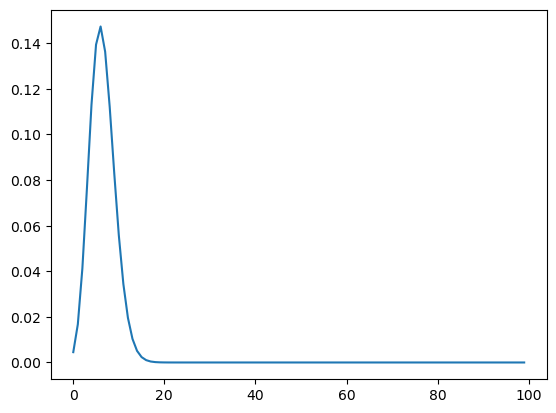

In [88]:
plt.plot(data_pois)
plt.show()

#### Функция распределения Лапласа
$$f(x | \mu, b) = \frac{1}{2b} \exp^{ -\frac{|x - \mu|}{b}}$$

In [7]:
def Laplace(x, m: float = 0.4, d: float = 0.):
    '''
    Func:
        Распределение Лапласа.
    
    Args:
        m - мат. ожидание.
        d - дисперсия.
    
    Return:
        Возвращает случайное число, соответствующее распределению.
    '''
    return (1 / 2 * m) * math.e ** (abs(x - d) / -m)

In [8]:
x = np.linspace(-5, 5, 1000)
data_lapl = [Laplace(dot, 0.8, 2) for dot in x.tolist()]

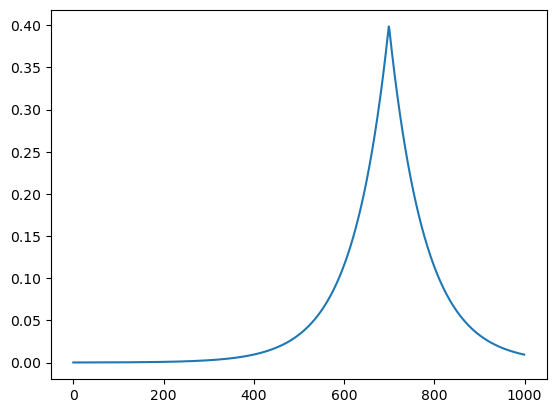

In [9]:
plt.plot(data_lapl)
plt.show()

#### Функция посложнее

## Rejection Sampling

**Rejection Sampling** это средство генерации случайных чисел, принадлежащих определенному распределению.

Чаще всего применяется для семплирования сложных вероятностных распределений, в котором генерация семплов по $f(x)$ происходит с помощью более простого вспомогательного распределения $g(x)$, которое уже известно, как семплировать, и которое удовлетворяет следующему условию: $$\forall x \to f(x) < cg(x) $$
$c > 1$ - константа вероятностного распределения.

Примерная логика работы алгоритма:

1. Взять семпл $x$ по базовому $g(x)$ распределению 

2. Выбрать случайное число n из отрезка $[0; cg(x)]$ 

3. Вычислить $f(x)$

    - Если $n \leq f(x)$, то $x$ добавляется к семплам

    - Если $n > f(x)$, то $x$ отклоняется


4. Алгоритм выбирает точки $[x, n]$ из области под графиком $f(x)$, так происходит сэмплирование.

5. Алгоритм эффективен, когда форма вспомогательной функции $g()$ близка к форме целевой функции $f(x)$.

- https://cosmiccoding.com.au/tutorials/rejection_sampling

In [100]:
def rej_sampl(data: np.array, target_func: Mapping, base_func: Mapping,
              size: int = 1000, c: float = 1.) -> Tuple:
    true_x=[]
    true_y=[]
    false_x=[]
    false_y=[]
    
    # задаем границы
    y_min = min([target_func(dot) for dot in data.tolist()])
    
    x = np.random.uniform(data.min(), data.max(), size=size)
    y = np.random.uniform(y_min, c * base_func(x), size=size)
    
    for i in range(len(x)): 
        if target_func == Poisson:
            val = int(x[i])
        else:
            val = x[i]
        if y[i] <= target_func(val):
            true_x.append(x[i])
            true_y.append(y[i])
        else:
            false_x.append(x[i])
            false_y.append(y[i])
            
    return x, y, true_x, true_y, false_x, false_y

In [101]:
x = np.linspace(-10, 10, 1000)
rsl = rej_sampl(x, Laplace, normal_distr, c=2.8, size=4000)

In [102]:
print(len(rs[0]), len(rs[1]), len(rs[2]), len(rs[3]), len(rs[4]), len(rs[5]))

4000 4000 167 167 3833 3833


In [128]:
x = np.arange(1, 101)
rsp = rej_sampl(x, Poisson, normal_distr, c=20, size=2000)

In [109]:
def plot(x, func: Mapping, title: str, true_x, true_y, false_x, false_y, show_density=False):
    
    y = [func(i) for i in x]

    fig, ax = plt.subplots(figsize=(16,8))
    if show_density:
        plt.hist(rs[2], 15, density=True, color='lightblue', alpha=0.4)
    plt.plot(x, y, color='blue', alpha=0.8)
    plt.scatter(true_x, true_y, s=2, color='magenta')
    plt.scatter(false_x, false_y, s=1, color='mediumturquoise')


    ax.set_title(f'Rejection Sampling of {title} Function', fontweight='bold')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    plt.show()

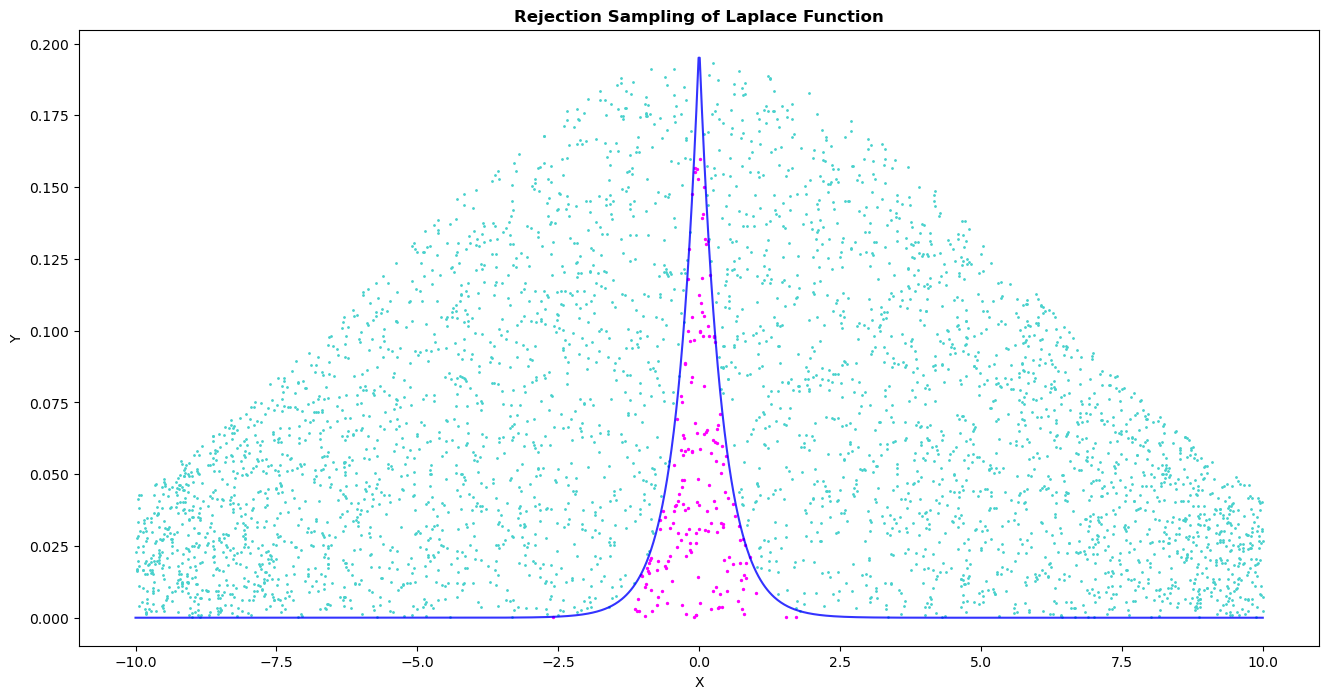

In [117]:
x = np.linspace(-10, 10, 1000)
plot(x, Laplace, 'Laplace', rsl[2], rsl[3], rsl[4], rsl[5])

In [135]:
print(f"Эффективность алгоритма: {len(rsl[2])/(len(rsl[4]) + len(rsl[2])) * 100:0.1f} %")

Эффективность алгоритма: 4.5 %


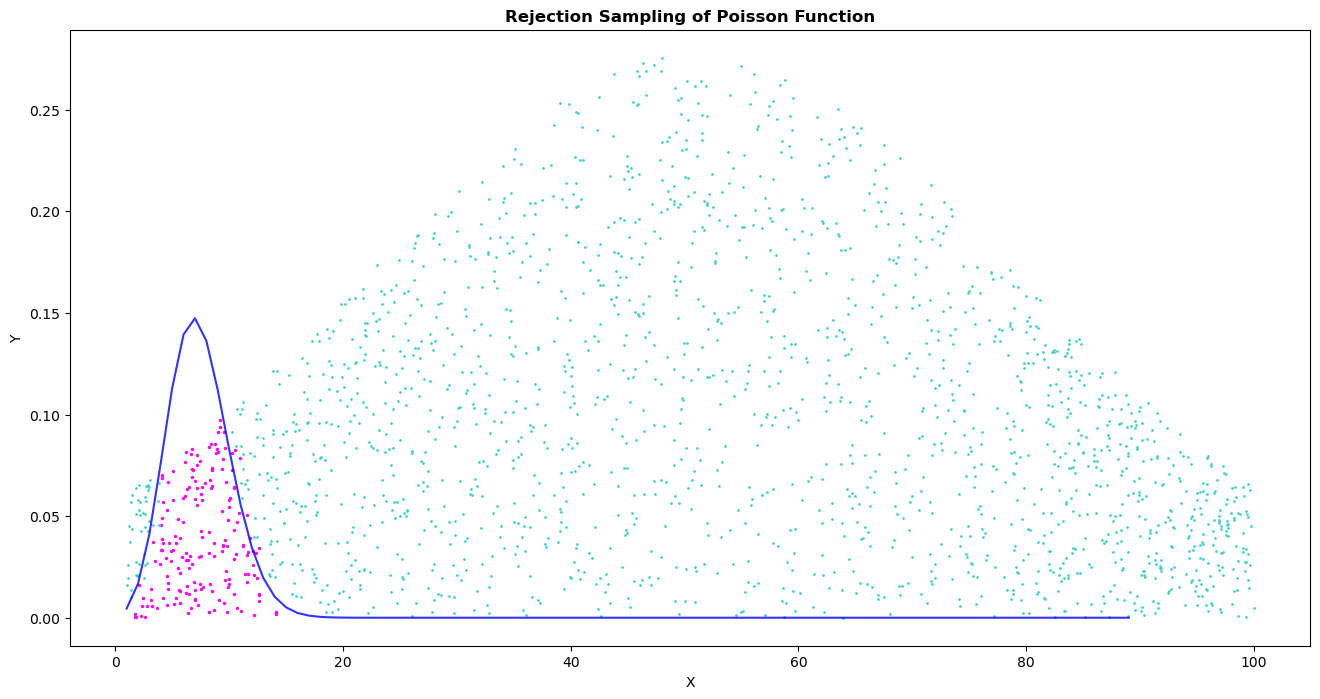

In [129]:
x = np.arange(1, 90)
plot(x, Poisson, 'Poisson', rsp[2], rsp[3], rsp[4], rsp[5])

In [136]:
print(f"Эффективность алгоритма: {len(rsp[2])/(len(rsp[4]) + len(rsp[2])) * 100:0.1f} %")

Эффективность алгоритма: 8.9 %


Низкие эффективности получены ввиду различия форм базовой и заданных для сэмплирования функций.

График слегка сбивается от выделенных точек, так как в распределении пуассона есть факториал, под которым могут быть только целые числа, поэтому при режекшон сэмплинге пришлось поставить условие  
`if target_func == Poisson:`

`    val = int(x[i])`

`else:`

`    val = x[i]`

поэтому некоторые округления сдвигают распределение точек по спискам с подходящими и неподходящими.

## MCMC

In [ ]:
def MCMC_sampl():
    '''
    Func:
    Реализация Metropolis Hastings
    Args:
    N - количество точек (int)
    f - функция
    x0 - начальная точка
    Return:
    выводит плотность точек на координату...?
    '''
    

In [ ]:
def Metr_Hast(n,f,x0):
    '''
    Реализация Metropolis Hastings
    Args:
    N - количество точек (int)
    f - функция
    x0 - начальная точка
    выводит плотность точек на координату...?
    '''

    x=[x0]
    while len(x) < n:
        x_prev = x[-1]
        x_next = np.random.normal(x_prev)
        ratio = f(x_next)/f(x_prev)
        if np.random.rand() < ratio:
            x.append(x_next)
        else:
            x.append(x_prev)
    return x

In [ ]:
def mcmc_sampler(data,
                 target_f: Mapping, 
                 known_f: Mapping,
                 total: int, 
                 max_dist: float = .5) -> np.array:
    
    """MCMC sampling with function that is known how to be sampled
    
       Args:
           data (np.array): data
           target_f (Mapping): target function
           known_f (Mapping): function that is known how to be sampled 
           total (int): sampling size
           max_dist (float, optional): maximum distance between previous and next values. Defaults to .5
        
       Result:
           np.array: previous values in probability
    """
    
    x_min = data.min()
    x_max = data.max()
    
    x_prev = np.random.uniform(x_min, x_max)
    samples = [x_prev]
    
    for i in range(total):
        x_next = np.random.normal(x_prev, max_dist)
        
        p_x_next = np.prod(target_f(x_next))
        p_x_prev = np.prod(target_f(x_prev))
        
        q_x_prev_x_next = known_f(np.array(sorted([x_prev, x_next])))[0]
        q_x_next_x_prev = known_f(np.array(sorted([x_next, x_prev])))[0]
        
        p_q_divider = p_x_next * q_x_prev_x_next
        p_q_denominator = p_x_prev * q_x_next_x_prev
        
        a_prob = p_q_divider / p_q_denominator
                
        if np.random.rand() < a_prob:
            x_prev = x_next
        
        samples.append(x_prev)
        
    return np.array(samples)

In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [7]:
genes = ['gene' + str(i) for i in range(1, 101)]
wt = ['wt' + str(i) for i in range(1, 6)]
ko = ['ko' + str(i) for i in range(1, 6)]

data = pd.DataFrame(columns=[*wt, *ko], index=genes)

In [3]:
[wt, ko]

[['wt1', 'wt2', 'wt3', 'wt4', 'wt5'], ['ko1', 'ko2', 'ko3', 'ko4', 'ko5']]

In [6]:
[*wt, *ko]

['wt1', 'wt2', 'wt3', 'wt4', 'wt5', 'ko1', 'ko2', 'ko3', 'ko4', 'ko5']

In [9]:
for gene in data.index:
    data.loc[gene, 'wt1': 'wt5'] = np.random.poisson(lam=rd.randrange(10, 1000), size=5)
    data.loc[gene, 'ko1': 'ko5'] = np.random.poisson(lam=rd.randrange(10, 1000), size=5) 

In [11]:
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,536,553,524,563,534,663,683,662,658,640
gene2,671,654,698,652,672,753,736,774,755,755
gene3,505,490,424,412,432,24,27,23,24,21
gene4,193,198,204,174,189,801,785,873,847,822
gene5,121,125,134,133,123,438,469,484,456,458
